<a href="https://colab.research.google.com/github/pavi-ninjaac/DeepLearningProjects/blob/main/rock_paper_seacer_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import cv2
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
#keras 
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix

#keras layers
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,AveragePooling2D
from keras.layers import Flatten,Dropout,Dense

In [3]:
#read the dataset
def generate_dataset(folder_name):
  """
  :param folder_name: list of folder names to be considered for converting.

  :return numpy array of data and target.
  """
  data, target = [],[]
  class_count = 0
  # generate the img array.
  for name in folder_name:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/{name}'
    print(f"Collecting images from the {name}..........")
    
    for image_name in os.listdir(folder_path):
      
      img = cv2.imread(f"{folder_path}/{image_name}")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (100, 100))
      data.append(img)
      target.append(class_count)


    class_count += 1
    print(f"Done :) , Collecting images from the {name}..........")
  
  # convert the array into numby array.
  print("Converting to numpy array........")
  data = np.array(data)
  target = np.array(target)

  return data, target
    
  
folder_name = ['rock', 'paper', 'scissors']
data_array, target_array = generate_dataset(folder_name)


Done :) , Collecting images from the rock..........
Done :) , Collecting images from the paper..........
Done :) , Collecting images from the scissors..........
Converting to numpy array........


In [ ]:
target_array.shape

(3001,)

In [ ]:
a= np.array([[1,2,3,],[1,3,4]])
b = np.array(['a','b'])
c=[]
for i,ii in zip(a,b):
  c.append([i,ii])
c= np.array(c)
print(c.shape)
i = c[:,0]
i

(2, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([array([1, 2, 3]), array([1, 3, 4])], dtype=object)

In [5]:
def preprocess_dataset(data, target):
  X_train,y_train,X_test,y_test,X_val,y_val = [],[],[],[],[],[] 

  print("Shuffling the dataset...............")
  dataset = []
  for d, t  in zip(data,target):
    dataset.append([d,t])
  dataset = np.array(dataset)
  np.random.shuffle(dataset)  

  print("spliting all data...................")
  train_count, test_count, val_count = int(dataset.shape[0] * 8/10), int(dataset.shape[0] * 1/10), int(dataset.shape[0] * 1/10)
  print(train_count, test_count, val_count)

  # X_train, y_train = dataset[0:train_count+1, 0], dataset[0:train_count+1, 1]
  # X_test, y_test = dataset[train_count+1:train_count+test_count+1 , 0], dataset[train_count+1:train_count+test_count+1 , 1]
  # X_val, y_val = dataset[train_count+test_count+1:-1 , 0], dataset[train_count+test_count+1:-1 , 1]
  for i in range(dataset.shape[0]):
    d = dataset[i]
    value, target = d[0], d[1]
    
    if i <= train_count:
      X_train.append(value)
      y_train.append(target)
    elif i > train_count and i <= (train_count+test_count):
      X_test.append(value)
      y_test.append(target)
    else:
      X_val.append(value)
      y_val.append(target)
      
  print("Converting to numpy array>>>>>>>>>>>>>>>>>>")
  #convert list to numpy array
  X_train = np.array(X_train,'float32')  
  y_train = np.array(y_train,'float32')  
  X_test = np.array(X_test,'float32')  
  y_test = np.array(y_test,'float32')
  X_val = np.array(X_val,'float32')  
  y_val = np.array(y_val,'float32')
  
  print("The size of the train data-------------------->",X_train.shape)
  print("The size of the train target data------------->",y_train.shape)
  print()
  print("The size of the test data--------------------->",X_test.shape)
  print("The size of the test target data-------------->",y_test.shape)
  print()
  print("The size of the validation data--------------->",X_val.shape)
  print("The size of the validation target data-------->",y_val.shape)

  print("Normalizing the data>>>>>>>>>>>>>>>>>>>>>>")
  #normalize the data
  X_train  = X_train/255.0
  X_test = X_test/255.0
  X_val = X_val/255.0

  print("Converting target to one hot encoded values>>>>>>>>>>>>>>>>>>>>>>")
  #convert to numerical values to 0,1
  y_train = to_categorical(y_train,num_classes=3)
  y_test = to_categorical(y_test,num_classes=3)
  y_val = to_categorical(y_val,num_classes=3)

  print(X_train[0].shape)
  print("reshaping the data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  
  X_train = X_train.reshape(X_train.shape[0] , 100 ,100 , 1)
  X_test = X_test.reshape(X_test.shape[0] , 100 ,100 , 1)
  X_val = X_val.reshape(X_val.shape[0] , 100 ,100 , 1)
  
  print("Preprocessing  completed!!!!!!!!!! stay happy :)")
  return X_train,y_train,X_test,y_test,X_val,y_val

In [19]:
X_train,y_train,X_test,y_test,X_val,y_val = preprocess_dataset(data_array, target_array)

Shuffling the dataset...............
spliting all data...................
2400 300 300
Converting to numpy array>>>>>>>>>>>>>>>>>>
The size of the train data--------------------> (2401, 100, 100)
The size of the train target data-------------> (2401,)

The size of the test data---------------------> (300, 100, 100)
The size of the test target data--------------> (300,)

The size of the validation data---------------> (300, 100, 100)
The size of the validation target data--------> (300,)
Normalizing the data>>>>>>>>>>>>>>>>>>>>>>
Converting target to one hot encoded values>>>>>>>>>>>>>>>>>>>>>>
(100, 100)
reshaping the data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Preprocessing  completed!!!!!!!!!! stay happy :)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [20]:
print("The size of the train data-------------------->",X_train.shape)
print("The size of the train target data------------->",y_train.shape)
print()
print("The size of the test data--------------------->",X_test.shape)
print("The size of the test target data-------------->",y_test.shape)
print()
print("The size of the validation data--------------->",X_val.shape)
print("The size of the validation target data-------->",y_val.shape)

The size of the train data--------------------> (2401, 100, 100, 1)
The size of the train target data-------------> (2401, 3)

The size of the test data---------------------> (300, 100, 100, 1)
The size of the test target data--------------> (300, 3)

The size of the validation data---------------> (300, 100, 100, 1)
The size of the validation target data--------> (300, 3)


# Build the model:

In [ ]:
#building the model
def build_model(input_shape , num_classes , ):
  model = Sequential()
  model.add(Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=input_shape)) 
  model.add(Conv2D(64, (5, 5), activation='relu', padding='same', ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))

  #model.add(Conv2D(64, (5, 5), activation='relu', padding='same', ))
  #model.add(BatchNormalization())
  #model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(Conv2D(128, (3, 3), activation='relu',  padding='same', ))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same',))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(Flatten())

  model.add(Dense(1024, activation='relu',))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu', ))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='sigmoid'))


  # compile model
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  #model summary
  print(model.summary())

  return model

In [ ]:
model = build_model(input_shape = (100,100,1), num_classes = 3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       5

In [ ]:
# set callbacks
early_stoppping = EarlyStopping(monitor = 'val_loss',
                                min_delta = 0.001,
                                patience = 10,
                                restore_best_weights=True)

#set the global values
epoches = 20
batch_size = 64

#fit the model
history = model.fit(X_train, y_train,  
          batch_size=batch_size,  
          epochs=epoches,  
          verbose=1,  
          validation_data=(X_val, y_val),  
          shuffle=True)

Epoch 1/20
38/38 [==============================] - 748s 20s/step - loss: 2.9359 - accuracy: 0.8372 - val_loss: 12.0541 - val_accuracy: 0.2867
Epoch 2/20
38/38 [==============================] - 749s 20s/step - loss: 0.0640 - accuracy: 0.9900 - val_loss: 5.0654 - val_accuracy: 0.4500
Epoch 3/20
38/38 [==============================] - 748s 20s/step - loss: 0.0372 - accuracy: 0.9942 - val_loss: 8.0409 - val_accuracy: 0.4733
Epoch 4/20
38/38 [==============================] - 746s 20s/step - loss: 0.0400 - accuracy: 0.9929 - val_loss: 13.0033 - val_accuracy: 0.4033
Epoch 5/20
38/38 [==============================] - 749s 20s/step - loss: 0.0421 - accuracy: 0.9946 - val_loss: 3.5587 - val_accuracy: 0.7433
Epoch 6/20
38/38 [==============================] - 754s 20s/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 15.7418 - val_accuracy: 0.4633
Epoch 7/20
38/38 [==============================] - 751s 20s/step - loss: 0.0427 - accuracy: 0.9950 - val_loss: 5.7487 - val_accuracy: 0.6833
Epo

In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/rock_paper_seacer_model.h5")
# print("Saved model to disk")

Saved model to disk


In [22]:
def plot_confueion_matrix(y_test , y_pred , title = "Confusion Matrix"):
  classes = np.array(("rock", "paper","scissors"))

  cmap = plt.cm.Blues
  cm = confusion_matrix(y_test , y_pred)
  
  #plot the cm
  plt.figure(figsize=(7,7))
  plt.imshow(cm , interpolation='nearest' , cmap= cmap)
  plt.colorbar()
  thresh = cm.min() + (cm.max() - cm.min()) / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45,fontsize=10)
  plt.yticks(tick_marks, classes,fontsize = 10)

  plt.title(title)
  plt.xlabel('Predicted value')
  plt.ylabel('True values')

  plt.tight_layout()
  plt.show()
  #plt.save('path.ghb.png')


def plot_accuracy_loss_graph(result):
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)

  plt.plot(result.history['accuracy'])
  plt.plot(result.history['val_accuracy'])
  plt.title('VGG Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  
  #plt.savefig('ResNet Model Loss.png')

  plt.subplot(1,2,2)

  plt.plot(result.history['loss'])
  plt.plot(result.history['val_loss'])
  plt.title('VGG  Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  #plt.savefig('ResNet Model Loss.png')


In [11]:
# load the model from the disk

model  = load_model('/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/rock_paper_seacer_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       5

10/10 [==============================] - 23s 2s/step


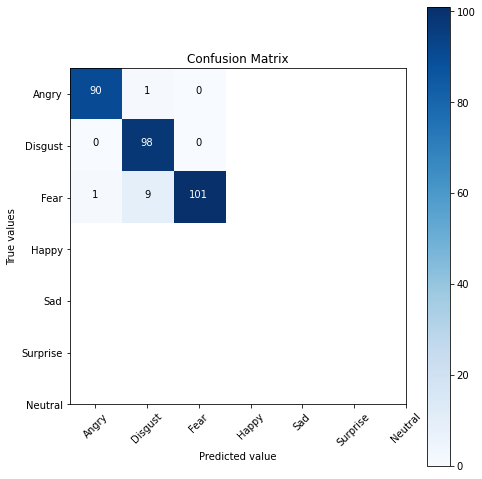

In [21]:
# plot the metrics

y_pred = model.predict(X_test , verbose=1)
y_pred = np.argmax(y_pred , axis = 1)

#change the test value to numerical
y_test = np.argmax(y_test , axis = 1)

plot_confueion_matrix(y_test = y_test , y_pred = y_pred)

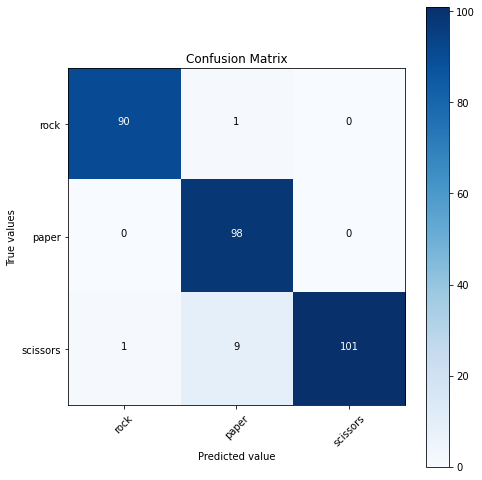

In [23]:
plot_confueion_matrix(y_test = y_test , y_pred = y_pred)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(1, 100, 100, 1)

The predicted class of the Image ----> rock


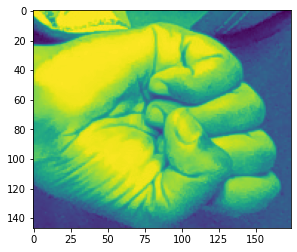

In [32]:
classes = ["rock", "paper","scissors"]
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/rock/rock_0.jpg' , target_size = (100,100) , grayscale =True)
show_img = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/rock/rock_0.jpg' , grayscale =True)
x = image.img_to_array(img)
x = np.expand_dims(x , axis = 0)
x =x/255.0
print(x.shape)
#predict the image
pred = model.predict(x)
a = np.argmax( pred, axis=1)

#show the image
plt.imshow(show_img)
print()
print("The predicted class of the Image ---->",classes[a[0]])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(1, 100, 100, 1)

The predicted class of the Image ----> scissors


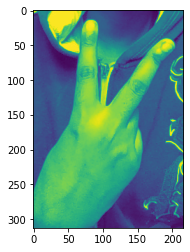

In [33]:
classes = ["rock", "paper","scissors"]
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/scissors/scissors_14.jpg' , target_size = (100,100) , grayscale =True)
show_img = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataFiles/rock-paper-seacer/scissors/scissors_14.jpg' , grayscale =True)
x = image.img_to_array(img)
x = np.expand_dims(x , axis = 0)
x =x/255.0
print(x.shape)
#predict the image
pred = model.predict(x)
a = np.argmax( pred, axis=1)

#show the image
plt.imshow(show_img)
print()
print("The predicted class of the Image ---->",classes[a[0]])